## TSF GRIP DATA SCIENCE AND BUSINESS ANALYTICS INTERN


# Task 2 : <span style="color: black;">Prediction using Unsupervised ML</span> (<span style="color: black;">K-means Clustering</span>)






### Author : Aishani Aarya


### Problem Statement:

**Predict the optimum number of clusters and represent it visually.**


In this notebook ,we will use the iris dataset,to predict the optimum number of clusters.

### Importing all the neccesary libraries required in this notebook

In [15]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  

from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

### Reading Data from source 

In [16]:

iris=pd.read_csv(r"C:\\Users\Dell\Downloads\iris.csv")

#Top values of Dataset
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Understanding the Data

In [17]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [19]:
iris.shape

(150, 6)

In [20]:

iris['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Analyzing the data for null values or error

In [7]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Since, there is no Null Values present ,there is no need required for data cleaning.We can start visualizing the data

### Analyzing the data for duplicated values

In [9]:
print('Number of duplicated values=',iris.duplicated().sum())

Number of duplicated values= 0


In [24]:
iris.drop_duplicates(inplace=True)

In [25]:
iris.shape

(150, 6)

### Visualization

Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script.

<function matplotlib.pyplot.show(close=None, block=None)>

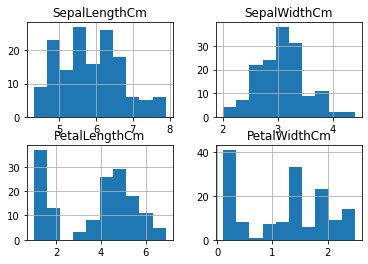

In [24]:
data=iris.drop('Id',axis=1)
data.hist()
plt.show

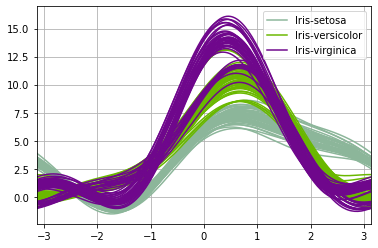

In [84]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "Species")
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


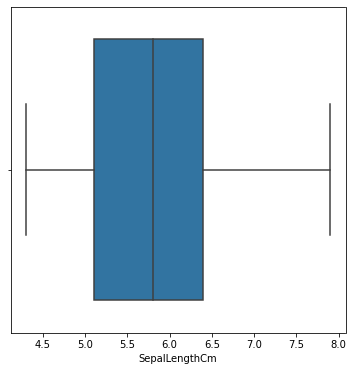

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


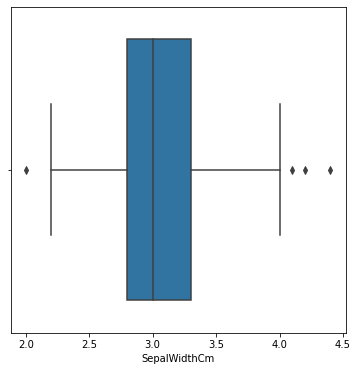

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


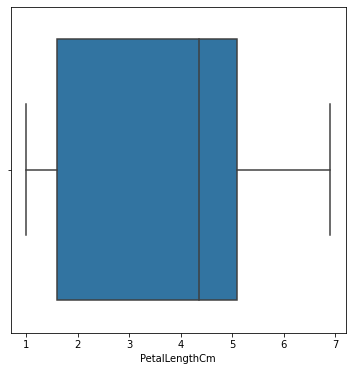

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


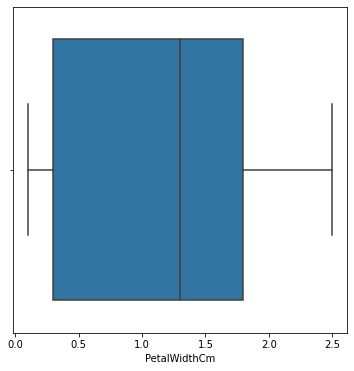

In [11]:
## Check for any Outliers in the numeric data

for i in iris.columns:
    if iris[i].dtype=='float64':
        plt.figure(figsize=(6,6))
        sns.boxplot(iris[i])
        plt.show()

**Hence, we see that in SepalWidthCm there are outliers so we will try to treat these outliers so it doesn't effect our data**

### Treating the outliers

In [12]:
q1,q3=np.percentile(iris['SepalWidthCm'],[25,75])
iqr=q3-q1
l_fence=q1-(1.5*iqr)
u_fence=q3+(1.5*iqr)
iris['SepalWidthCm']=iris['SepalWidthCm'].apply(lambda x:u_fence if x >u_fence
                                                else l_fence if x<l_fence else x)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

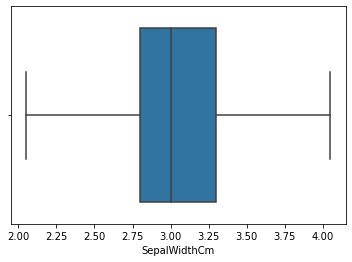

In [13]:
sns.boxplot(iris['SepalWidthCm'])

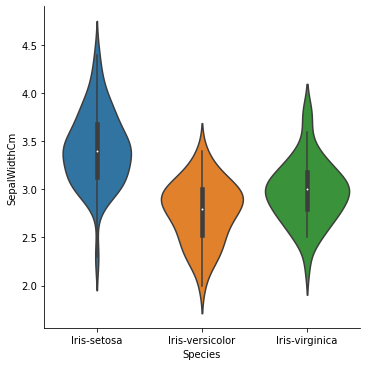

In [47]:
sns.catplot(x = 'Species', y = 'SepalWidthCm', data = iris, kind= 'violin')

**For other features**

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

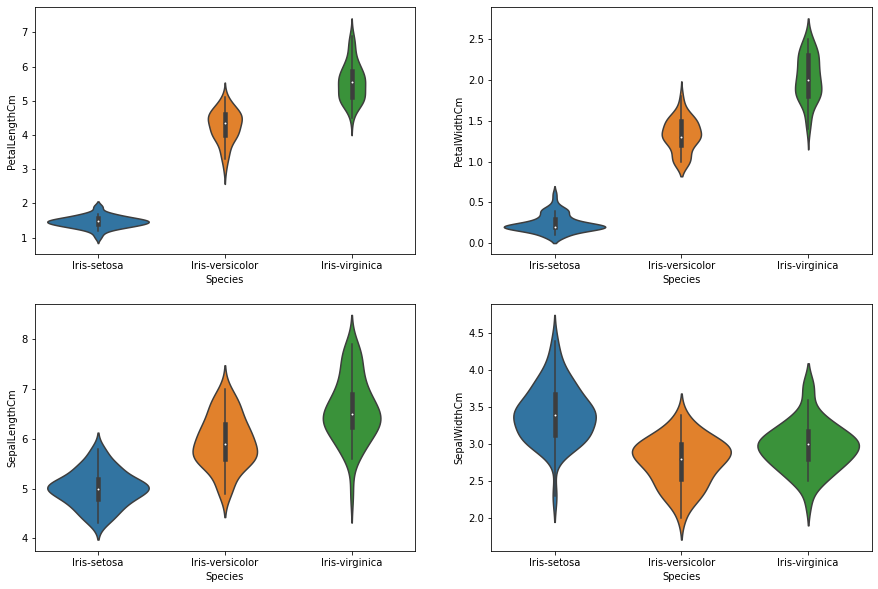

In [49]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=iris)

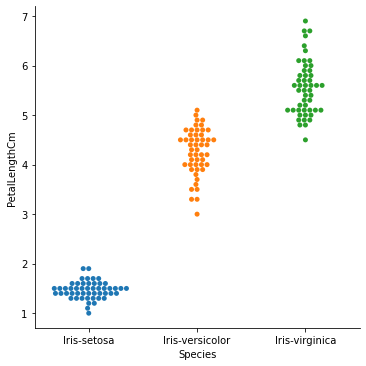

In [48]:
sns.catplot(x = 'Species', y = 'PetalLengthCm', data = iris, kind= 'swarm')

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Species', ylabel='count'>

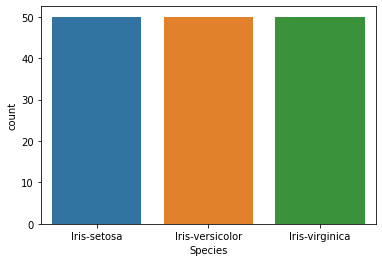

In [14]:
print(iris['Species'].value_counts())
sns.countplot(iris['Species'])

In [31]:
iris.Species.unique()
iris.Species.astype(str)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [34]:
iris=iris.drop('Id',axis=1)

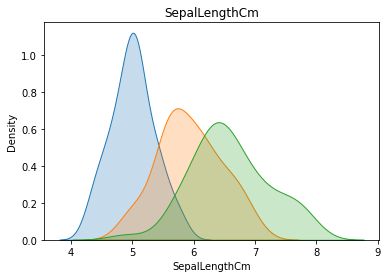

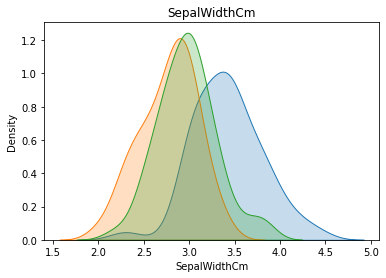

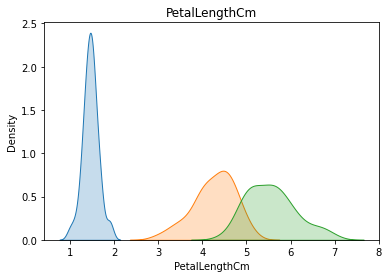

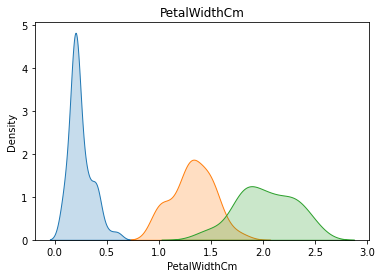

In [35]:
## Distribution of feature by Species

for i in iris.columns[:-1]:
    sns.kdeplot(data=iris.loc[iris.Species=='Iris-setosa'][i],label="Iris-setosa",shade=True)
    sns.kdeplot(data=iris.loc[iris.Species=='Iris-versicolor'][i],label="Iris-versicolor",shade=True)
    sns.kdeplot(data=iris.loc[iris.Species=='Iris-virginica'][i],label="Iris-virginica",shade=True)
    plt.title(i);
    plt.show()

<AxesSubplot:>

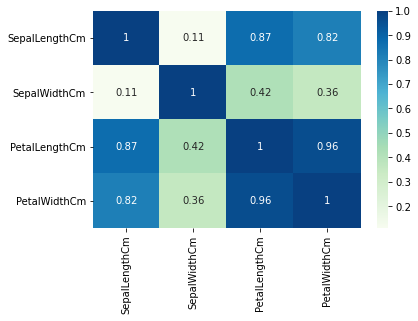

In [36]:
sns.heatmap(abs(iris.corr()),cmap='GnBu',annot=True)

In [39]:
WCSE=[]
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(iris.iloc[:,[0,1,2,3]])
    WCSE.append(kmeans.inertia_)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


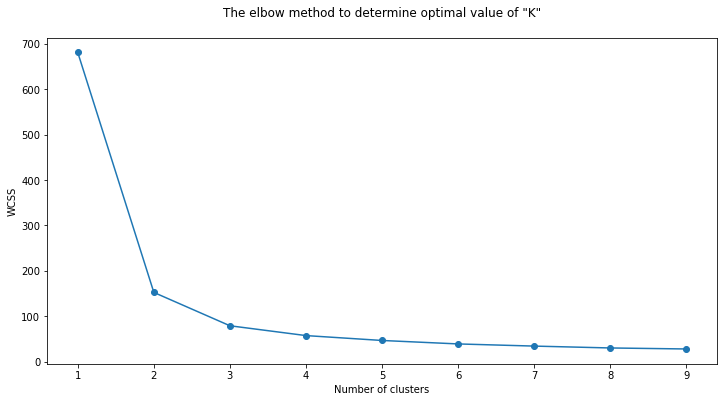

In [41]:
dc=pd.DataFrame({'Cluster':range(1,10),'WCSE':WCSE})
plt.figure(figsize=(12,6))
plt.plot(dc['Cluster'],dc['WCSE'],marker='o')
plt.title('The elbow method to determine optimal value of "K"\n')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### As we can see from the Graph optimal no of clusters are 3

elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

### Applying k-means to the dataset

In [74]:
x=iris.iloc[:,[0,1,2,3]].values

kmeans=KMeans(n_clusters=3,init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
u=kmeans.fit(x)
u.cluster_centers_

# Applying kmeans to the dataset / Creating the kmeans classifier



array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [75]:
u.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [76]:
iris['cluster']=u.labels_
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [81]:
display(iris.cluster.value_counts(),iris.Species.value_counts())

0    62
1    50
2    38
Name: cluster, dtype: int64

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Visualising the clusters


In [78]:

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [82]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

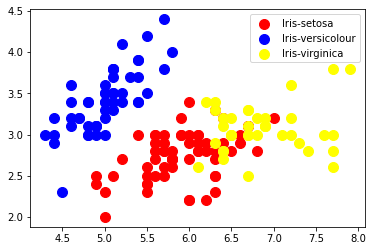

In [80]:
 ## the 0,0 and 0,1 represents cluster and feature respectively
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

plt.legend()

#### Plotting Centroid

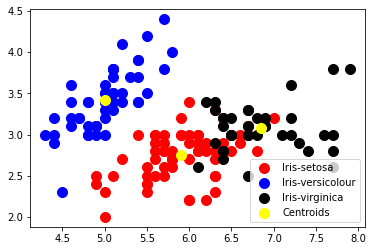

In [83]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


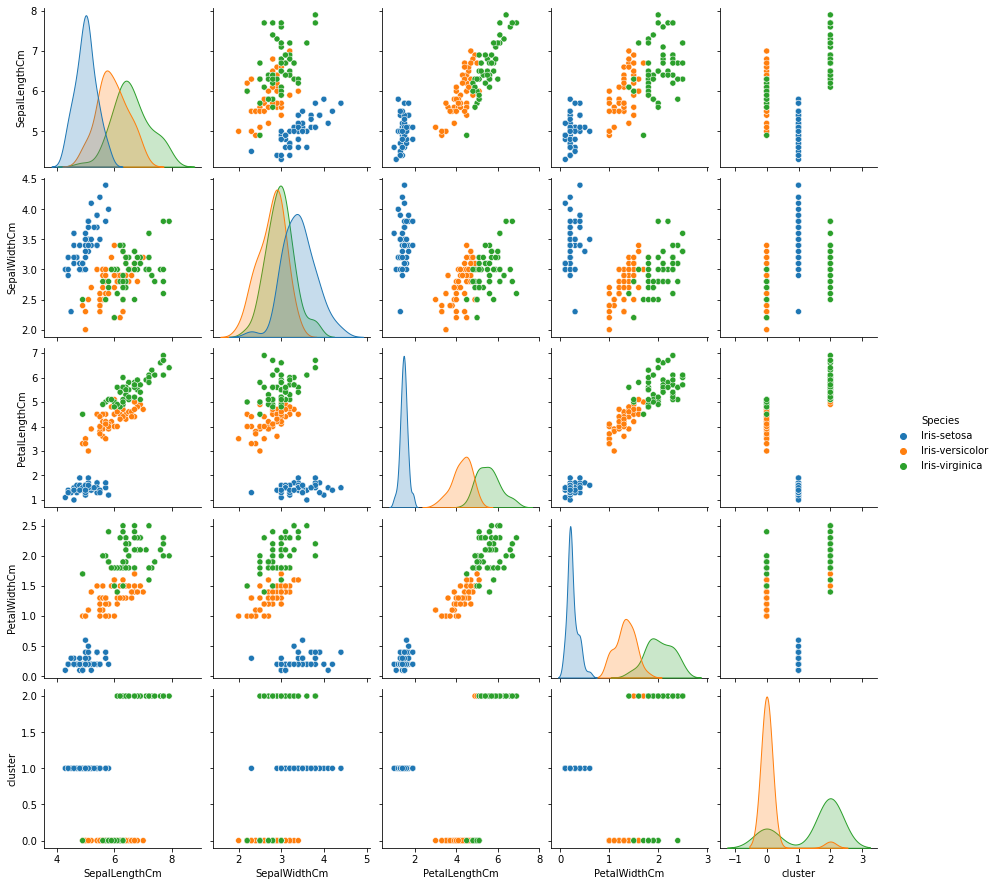

In [61]:
sns.pairplot(iris,hue='Species');

In [85]:
iris.loc[iris['Species']=='Iris-setosa']['cluster'].value_counts() ## the model has identified iris-setosa with 100% accuracy

1    50
Name: cluster, dtype: int64

In [86]:
iris.loc[iris['Species']=='Iris-versicolor']['cluster'].value_counts()

0    48
2     2
Name: cluster, dtype: int64

In [87]:
iris.loc[iris['Species']=='Iris-virginica']['cluster'].value_counts()

2    36
0    14
Name: cluster, dtype: int64

In [88]:

iris['Species_encoded'] = iris['Species'].apply(lambda x: 1 if x=='Iris-setosa' else 2 if x=='Iris-virginica' else 0)
iris

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster,Species_encoded
0,5.1,3.5,1.4,0.2,Iris-setosa,1,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,6.3,2.5,5.0,1.9,Iris-virginica,0,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2,2


### Checking the accuracy of Model

In [89]:

from sklearn.metrics import classification_report
print(classification_report(iris['Species_encoded'],iris['cluster']))

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150



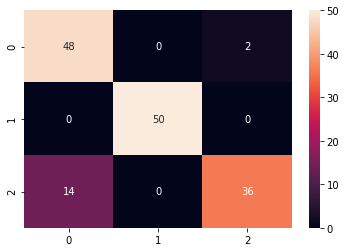

In [90]:

from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(iris['Species_encoded'],iris['cluster']), annot=True);